# Assignment 2
## Fully_Connected Neural Nets

之前我们在 cifar-10 上实现了两层的神经网络。但是，该实现过于简单，并没有按照模块化设计——损失和梯度的计算都是在一个庞大而单一的函数中实现的

这一节中，我们将过模块化的方式实现全连接神经网络。每一层都有一个 forward 函数和一个 bakcward 函数

forward 函数接收输入数据、权重和其他一些参数，返回一个数组和一个 cache object 存储用于反向传播的数据。函数结构如下：

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output

  cache = (x, w, z, out) # Values we need to compute gradients

  return out, cache 
```

backward 函数接收上游传回的导数以及 cache object，返回输入和权重对应的梯度信息。函数结构如下：

```python
def layer_backward(dout, cache):
  """
  Receive derivative of loss with respect to outputs and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache

  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w

  return dx, dw
```

In [34]:
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
data = get_CIFAR10_data()
for k, v in data.items():
  print('%s: ' % k, v.shape)

X_train:  (49000, 3, 32, 32)
y_train:  (49000,)
X_val:  (1000, 3, 32, 32)
y_val:  (1000,)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)


## Affine layer: forward

In [36]:
# 测试 affine_funtion 函数

num_input = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_input * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num = input_size).reshape(num_input, *input_shape)
w = np.linspace(-0.2, 0.3, num = weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num = output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297], [ 3.25553199,  3.5141327,   3.77273342]])

print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.7698500479884e-10


## Affine layer: backward

In [37]:
# 测试 affine_backward 函数
 
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  1.0184685223548994e-10
dw error:  1.461193950891487e-10
db error:  2.7861012319579376e-11


## ReLu layer: forward

In [38]:
# 测试 relu_forward 函数

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


## ReLU layer: backward

In [39]:
# 测试 relu_backward 函数

x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756249343167394e-12


## Sandwich layers



In [40]:
from cs231n.layer_utils import affine_relu_forward, affine_relu_backward

x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

print('Testing affine_relu_forward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward:
dx error:  4.715497710230435e-10
dw error:  2.100482272064442e-10
db error:  1.8928869416095832e-11


## Loss layers: softmax and SVM

In [41]:

num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose = False)
loss, dx = svm_loss(x, y)

print('Testing svm_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose = False)
loss, dx = softmax_loss(x, y)

print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

Testing svm_loss:
loss:  8.998544785075048
dx error:  8.182894472887002e-10

Testing softmax_loss:
loss:  2.3024400621230425
dx error:  1.0326625741442482e-08


## Two-layer net

In [42]:
# 模块化实现两层全连接神经网络

N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size = N)

std = 1e-2
model = TwoLayerNet(input_dim = D, hidden_dim = H, num_classes = C, weight_scale = std)

print('Testing initialization...')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

print('Testing test_time forward pass...')
model.params['W1'] = np.linspace(-0.7, 0.3, num = D * H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num = H)
model.params['W2'] = np.linspace(-0.3, 0.4, num = H * C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num = C)
X = np.linspace(-5.5, 4.5, num = N * D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no regularization)...')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

for reg in [0.0, 0.7]:
    print('Running numeric gradient check with reg = ', reg)
    model.reg = reg
    loss, grads = model.loss(X, y)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose = False)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Testing initialization...
Testing test_time forward pass...
Testing training loss (no regularization)...
Running numeric gradient check with reg =  0.0
W1 relative error: 1.22e-08
W2 relative error: 3.34e-10
b1 relative error: 4.73e-09
b2 relative error: 4.33e-10
Running numeric gradient check with reg =  0.7
W1 relative error: 3.12e-07
W2 relative error: 7.98e-08
b1 relative error: 1.09e-09
b2 relative error: 7.76e-10


## Solver

In [43]:
# 我们创建 Solver 的一个实例，用来驯良两层神经网路模型。在验证集上该模型的准确率至少可以达到 50%
model = TwoLayerNet(reg = 1e-1)
solver = None
solver = Solver(model, data, update_rule='sgd', optim_config={'learning_rate': 1e-3,}, lr_decay=0.8, num_epochs=10, batch_size=100, print_every=100)
solver.train()
scores = model.loss(data['X_test'])
y_pred = np.argmax(scores, axis = 1)
acc = np.mean(y_pred == data['y_test'])
print('test acc: %f' % acc)

(Iteration 1 / 4900) loss: 2.324013
(Epoch 0 / 10) train acc: 0.103000; val_acc: 0.115000
(Iteration 101 / 4900) loss: 1.918107
(Iteration 201 / 4900) loss: 1.709329
(Iteration 301 / 4900) loss: 1.604443
(Iteration 401 / 4900) loss: 1.489849
(Epoch 1 / 10) train acc: 0.439000; val_acc: 0.450000
(Iteration 501 / 4900) loss: 1.494228
(Iteration 601 / 4900) loss: 1.624437
(Iteration 701 / 4900) loss: 1.661252
(Iteration 801 / 4900) loss: 1.653182
(Iteration 901 / 4900) loss: 1.417254
(Epoch 2 / 10) train acc: 0.501000; val_acc: 0.472000
(Iteration 1001 / 4900) loss: 1.456024
(Iteration 1101 / 4900) loss: 1.359998
(Iteration 1201 / 4900) loss: 1.337291
(Iteration 1301 / 4900) loss: 1.338448
(Iteration 1401 / 4900) loss: 1.522990
(Epoch 3 / 10) train acc: 0.555000; val_acc: 0.483000
(Iteration 1501 / 4900) loss: 1.333254
(Iteration 1601 / 4900) loss: 1.327207
(Iteration 1701 / 4900) loss: 1.485940
(Iteration 1801 / 4900) loss: 1.373806
(Iteration 1901 / 4900) loss: 1.305174
(Epoch 4 / 10) t

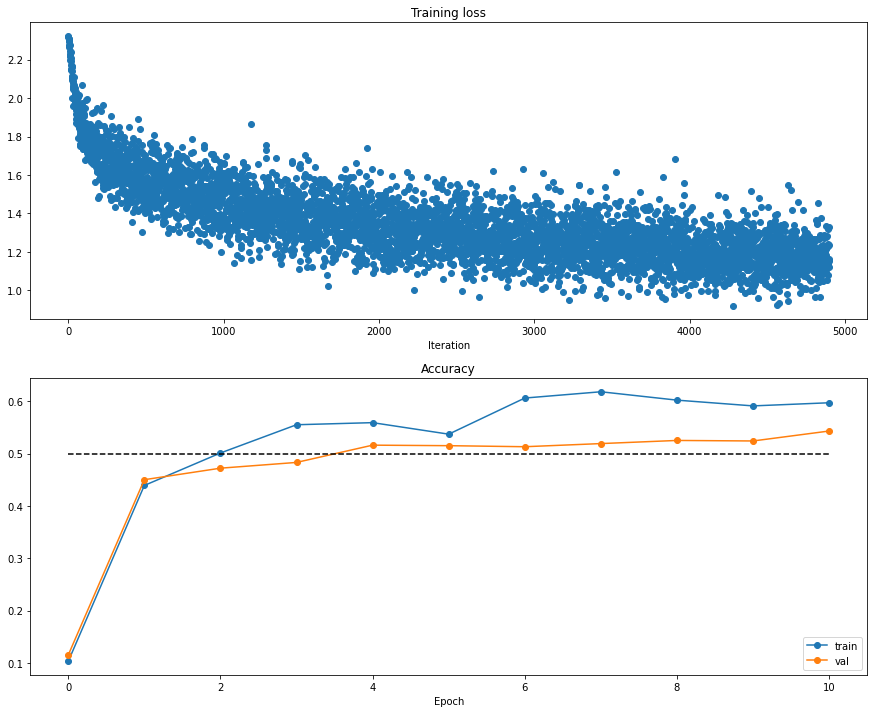

In [44]:
# 可视化训练损失和训练集准确率、验证集准确率

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label = 'train')
plt.plot(solver.val_acc_history, '-o', label = 'val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

## Multilayer network

In [45]:
# 初始化和梯度检查，梯度检查时我们期望错误在 1e-6 左右或者更小

N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size = (N,))

for reg in [0, 3.14]:
    print('Running check with reg = ', reg)
    model = FullyConnectedNet([H1, H2], input_dim = D, num_classes = C, reg = reg, weight_scale = 5e-2, dtype = np.float64)
    loss, grads = model.loss(X, y)
    print('Initial loss: ', loss)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose = False, h = 1e-5)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Running check with reg =  0
Initial loss:  2.3065099556361615
W1 relative error: 3.23e-07
W2 relative error: 2.57e-06
W3 relative error: 4.52e-08
b1 relative error: 8.68e-09
b2 relative error: 1.44e-08
b3 relative error: 1.37e-10
Running check with reg =  3.14
Initial loss:  6.919302165655673
W1 relative error: 2.70e-08
W2 relative error: 6.05e-07
W3 relative error: 3.99e-07
b1 relative error: 4.25e-08
b2 relative error: 8.43e-09
b3 relative error: 3.45e-10


(Iteration 1 / 40) loss: 2.291483
(Epoch 0 / 20) train acc: 0.260000; val_acc: 0.116000
(Epoch 1 / 20) train acc: 0.260000; val_acc: 0.093000
(Epoch 2 / 20) train acc: 0.280000; val_acc: 0.082000
(Epoch 3 / 20) train acc: 0.460000; val_acc: 0.125000
(Epoch 4 / 20) train acc: 0.460000; val_acc: 0.110000
(Epoch 5 / 20) train acc: 0.640000; val_acc: 0.177000
(Iteration 11 / 40) loss: 1.636610
(Epoch 6 / 20) train acc: 0.700000; val_acc: 0.186000
(Epoch 7 / 20) train acc: 0.780000; val_acc: 0.187000
(Epoch 8 / 20) train acc: 0.820000; val_acc: 0.205000
(Epoch 9 / 20) train acc: 0.860000; val_acc: 0.189000
(Epoch 10 / 20) train acc: 0.880000; val_acc: 0.168000
(Iteration 21 / 40) loss: 0.658044
(Epoch 11 / 20) train acc: 0.880000; val_acc: 0.167000
(Epoch 12 / 20) train acc: 0.960000; val_acc: 0.183000
(Epoch 13 / 20) train acc: 0.960000; val_acc: 0.192000
(Epoch 14 / 20) train acc: 0.980000; val_acc: 0.176000
(Epoch 15 / 20) train acc: 0.960000; val_acc: 0.196000
(Iteration 31 / 40) loss: 

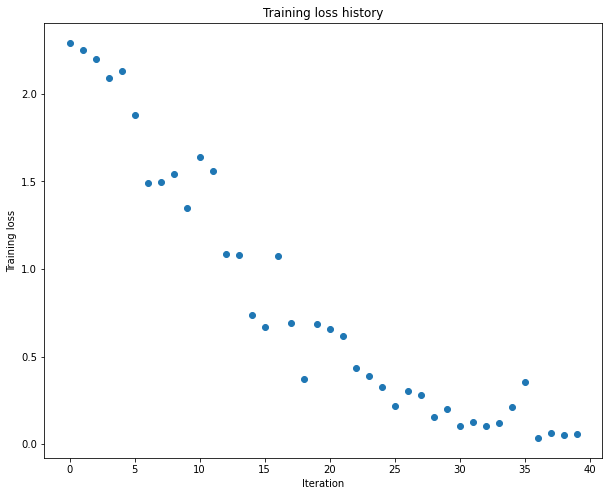

In [46]:
# 另外一种检查的方式是，保证我们能够在 50 张图片的数据集上形成过拟合
# 我们先试验一个三层、每个隐藏层有 100 个神经元的网络，调整学习率和初始范围，在 20 个周期内该模型就可以在训练集上达到过拟合

num_train = 50
small_data = {'X_train': data['X_train'][:num_train],
              'y_train': data['y_train'][:num_train],
              'X_val': data['X_val'],
              'y_val': data['y_val'],}

weight_scale = 1e-2
learning_rate = 8e-3
model  = FullyConnectedNet([100, 100], weight_scale = weight_scale, dtype = np.float64)
solver = Solver(model,
                small_data,
                print_every = 10,
                num_epochs = 20,
                batch_size = 25,
                update_rule = 'sgd',
                optim_config = {'learning_rate': learning_rate,})
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

In [47]:
# 现在试试五层、每层 100 个神经元的网络，同样调整学习率和初始化范围，模型可以在 20 个周期达到过拟合

num_train = 50
small_data = {'X_train': data['X_train'][:num_train],
              'y_train': data['y_train'][:num_train],
              'X_val': data['X_val'],
              'y_val': data['y_val'],}

learning_rate = 3e-4
weight_scale = 1e-1
model = FullyConnectedNet([100, 100, 100, 100],
                weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, 
                small_data,
                print_every=10, 
                num_epochs=20, 
                batch_size=25,
                update_rule='sgd',
                optim_config={'learning_rate': learning_rate,})
solver.train()

loss_history1 = solver.loss_history

(Iteration 1 / 40) loss: 143.645320
(Epoch 0 / 20) train acc: 0.120000; val_acc: 0.106000
(Epoch 1 / 20) train acc: 0.200000; val_acc: 0.103000
(Epoch 2 / 20) train acc: 0.440000; val_acc: 0.113000
(Epoch 3 / 20) train acc: 0.440000; val_acc: 0.116000
(Epoch 4 / 20) train acc: 0.520000; val_acc: 0.120000
(Epoch 5 / 20) train acc: 0.620000; val_acc: 0.123000
(Iteration 11 / 40) loss: 11.382249
(Epoch 6 / 20) train acc: 0.720000; val_acc: 0.104000
(Epoch 7 / 20) train acc: 0.720000; val_acc: 0.114000
(Epoch 8 / 20) train acc: 0.880000; val_acc: 0.122000
(Epoch 9 / 20) train acc: 0.920000; val_acc: 0.112000
(Epoch 10 / 20) train acc: 0.960000; val_acc: 0.112000
(Iteration 21 / 40) loss: 0.499741
(Epoch 11 / 20) train acc: 0.960000; val_acc: 0.116000
(Epoch 12 / 20) train acc: 0.960000; val_acc: 0.116000
(Epoch 13 / 20) train acc: 0.980000; val_acc: 0.113000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.113000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.113000
(Iteration 31 / 40) los

In [48]:
num_train = 50
small_data = {'X_train': data['X_train'][:num_train],
              'y_train': data['y_train'][:num_train],
              'X_val': data['X_val'],
              'y_val': data['y_val'],}

learning_rate = 3e-4
weight_scale = 1e-5
model = FullyConnectedNet([100, 100, 100, 100],
                weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, 
                small_data,
                print_every=10, 
                num_epochs=20, 
                batch_size=25,
                update_rule='sgd',
                optim_config={'learning_rate': learning_rate,})
solver.train()

loss_history2 = solver.loss_history

(Iteration 1 / 40) loss: 2.302585
(Epoch 0 / 20) train acc: 0.120000; val_acc: 0.105000
(Epoch 1 / 20) train acc: 0.120000; val_acc: 0.105000
(Epoch 2 / 20) train acc: 0.120000; val_acc: 0.119000
(Epoch 3 / 20) train acc: 0.160000; val_acc: 0.112000
(Epoch 4 / 20) train acc: 0.160000; val_acc: 0.112000
(Epoch 5 / 20) train acc: 0.160000; val_acc: 0.112000
(Iteration 11 / 40) loss: 2.302532
(Epoch 6 / 20) train acc: 0.160000; val_acc: 0.112000
(Epoch 7 / 20) train acc: 0.160000; val_acc: 0.112000
(Epoch 8 / 20) train acc: 0.160000; val_acc: 0.112000
(Epoch 9 / 20) train acc: 0.160000; val_acc: 0.112000
(Epoch 10 / 20) train acc: 0.160000; val_acc: 0.112000
(Iteration 21 / 40) loss: 2.302428
(Epoch 11 / 20) train acc: 0.160000; val_acc: 0.112000
(Epoch 12 / 20) train acc: 0.160000; val_acc: 0.112000
(Epoch 13 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 14 / 20) train acc: 0.160000; val_acc: 0.112000
(Epoch 15 / 20) train acc: 0.160000; val_acc: 0.112000
(Iteration 31 / 40) loss: 

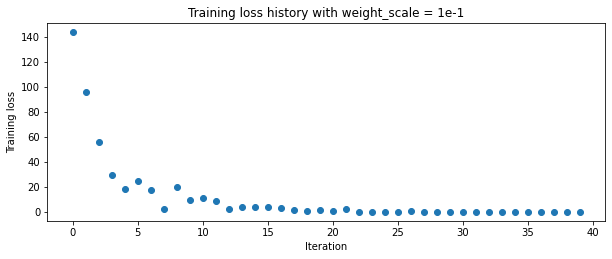

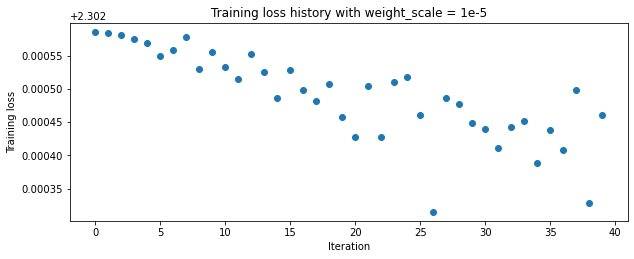

In [49]:
plt.subplot(2, 1, 1)
plt.plot(loss_history1, 'o')
plt.title('Training loss history with weight_scale = 1e-1')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(loss_history2, 'o')
plt.title('Training loss history with weight_scale = 1e-5')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

注意到训练三层网络和训练五层网络它们之间的相对难度了吗？

答：

当我们在训练五层网络的超参数时，最小损失对 weight_scale 更敏感，更大的 weight_scale 使得损失函数容易收敛到局部最小值。这种现象的发生是因为五层网络的容量更大，使得其损失函数较三层神经网络的损失函数更复杂，更难以达到最优域，并且对初始化十分敏感

## SGD + Momentum

在前面，我们使用的更新规则都是 SGD，下面我们将开始使用其他的更新规则，例如动量 SGD、Adam 等

In [50]:
# 确保动量 SGD 实现正确，这步检查的相对误差应小于 1e-8

from cs231n.optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print('next_w error: ', rel_error(next_w, expected_next_w))
print('velocity error: ', rel_error(expected_velocity, config['velocity']))

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


running with  sgd
(Iteration 1 / 200) loss: 2.758766
(Epoch 0 / 5) train acc: 0.088000; val_acc: 0.088000
(Iteration 11 / 200) loss: 2.287118
(Iteration 21 / 200) loss: 2.173158
(Iteration 31 / 200) loss: 2.115799
(Epoch 1 / 5) train acc: 0.276000; val_acc: 0.263000
(Iteration 41 / 200) loss: 2.021659
(Iteration 51 / 200) loss: 1.753075
(Iteration 61 / 200) loss: 1.884688
(Iteration 71 / 200) loss: 1.876646
(Epoch 2 / 5) train acc: 0.331000; val_acc: 0.263000
(Iteration 81 / 200) loss: 1.794502
(Iteration 91 / 200) loss: 1.754834
(Iteration 101 / 200) loss: 1.836387
(Iteration 111 / 200) loss: 1.933177
(Epoch 3 / 5) train acc: 0.391000; val_acc: 0.297000
(Iteration 121 / 200) loss: 1.682126
(Iteration 131 / 200) loss: 1.661392
(Iteration 141 / 200) loss: 1.701756
(Iteration 151 / 200) loss: 1.724792
(Epoch 4 / 5) train acc: 0.407000; val_acc: 0.322000
(Iteration 161 / 200) loss: 1.643589
(Iteration 171 / 200) loss: 1.749619
(Iteration 181 / 200) loss: 1.513192
(Iteration 191 / 200) los

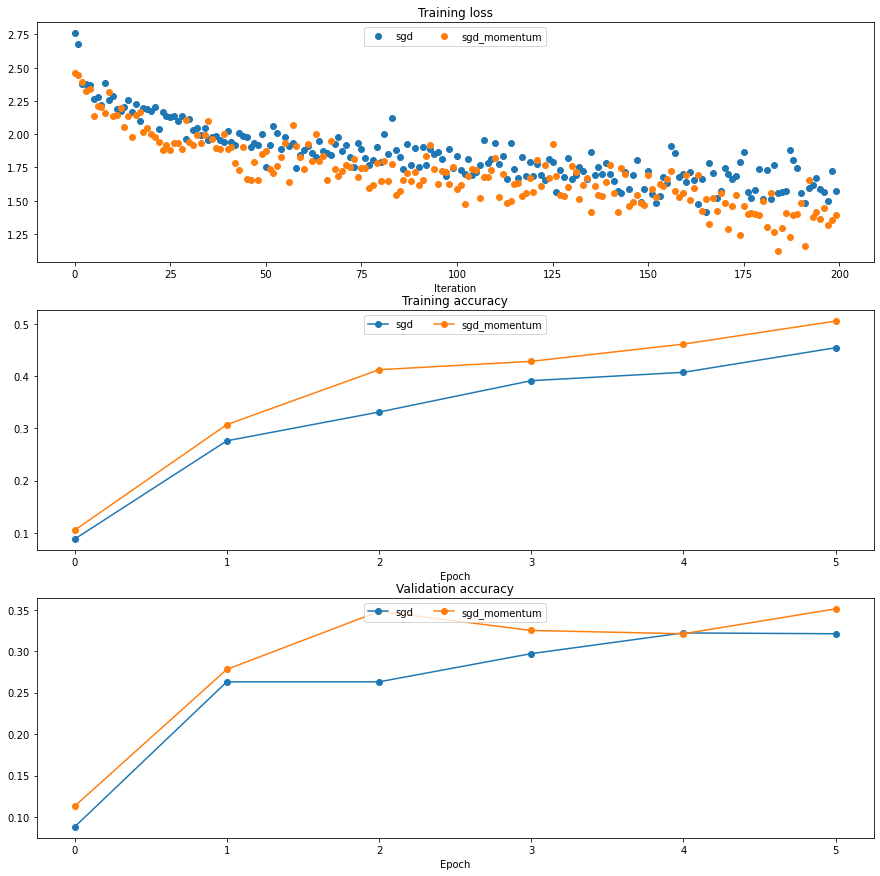

In [51]:
# 我们使用 SGD 和动量 SGD 训练一个 6 层的神经网络，很容易发现使用动量 SGD 更新规则训练速度更快

num_train = 4000
small_data = {'X_train': data['X_train'][:num_train],
            'y_train': data['y_train'][:num_train],
            'X_val': data['X_val'],
            'y_val': data['y_val'],}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
  print('running with ', update_rule)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, 
                  small_data,
                  num_epochs=5,
                  batch_size=100,
                  update_rule=update_rule,
                  optim_config={'learning_rate': 1e-2,},
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print('\n')

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=update_rule)
  
    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=update_rule)

    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)

plt.gcf().set_size_inches(15, 15)
plt.show()

## RMSProp and Adam

In [52]:
# 测试一下 rmsprop，错误应该低于 1e-7
from cs231n.optim import rmsprop

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'cache': cache}
next_w, _ = rmsprop(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print('next_w error: ', rel_error(expected_next_w, next_w))
print('cache error: ', rel_error(expected_cache, config['cache']))

next_w error:  9.524687511038133e-08
cache error:  2.6477955807156126e-09


In [53]:
# 测试一下 adama，错误应该低于 1e-7

from cs231n.optim import adam

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'm': m, 'v': v, 't': 5}
next_w, _ = adam(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print('next_w error: ', rel_error(expected_next_w, next_w))
print('v error: ', rel_error(expected_v, config['v']))
print('m error: ', rel_error(expected_m, config['m']))

next_w error:  1.1395691798535431e-07
v error:  4.208314038113071e-09
m error:  4.214963193114416e-09


running with  adam
(Iteration 1 / 200) loss: 2.607385
(Epoch 0 / 5) train acc: 0.169000; val_acc: 0.185000
(Iteration 11 / 200) loss: 2.115806
(Iteration 21 / 200) loss: 2.055787
(Iteration 31 / 200) loss: 2.048482
(Epoch 1 / 5) train acc: 0.391000; val_acc: 0.319000
(Iteration 41 / 200) loss: 1.654364
(Iteration 51 / 200) loss: 1.807013
(Iteration 61 / 200) loss: 1.995900
(Iteration 71 / 200) loss: 1.581168
(Epoch 2 / 5) train acc: 0.459000; val_acc: 0.317000
(Iteration 81 / 200) loss: 1.490496
(Iteration 91 / 200) loss: 1.588783
(Iteration 101 / 200) loss: 1.643790
(Iteration 111 / 200) loss: 1.563490
(Epoch 3 / 5) train acc: 0.488000; val_acc: 0.364000
(Iteration 121 / 200) loss: 1.477219
(Iteration 131 / 200) loss: 1.413819
(Iteration 141 / 200) loss: 1.428246
(Iteration 151 / 200) loss: 1.615311
(Epoch 4 / 5) train acc: 0.550000; val_acc: 0.366000
(Iteration 161 / 200) loss: 1.429784
(Iteration 171 / 200) loss: 1.180475
(Iteration 181 / 200) loss: 1.371730
(Iteration 191 / 200) lo

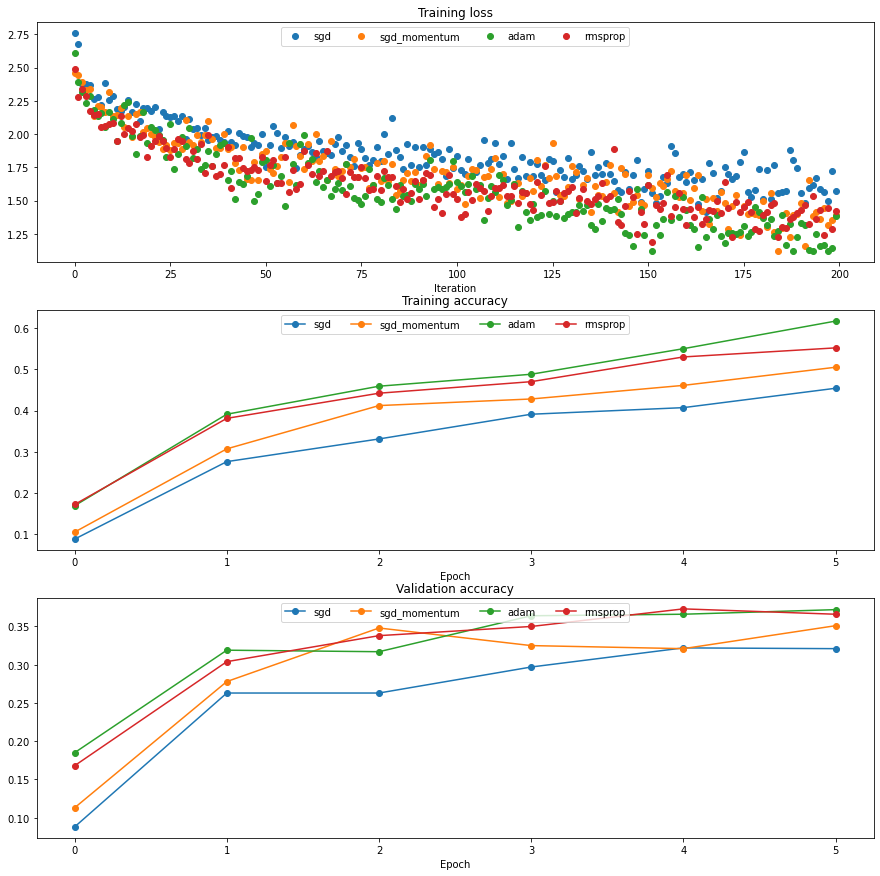

In [54]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
    print('running with ', update_rule)
    model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

    solver = Solver(model, 
                    small_data,
                    num_epochs=5, batch_size=100,
                    update_rule=update_rule,
                    optim_config={'learning_rate': learning_rates[update_rule]},
                    verbose=True)
    solvers[update_rule] = solver
    solver.train()
    print('\n')

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=update_rule)
  
    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=update_rule)

    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)

plt.gcf().set_size_inches(15, 15)
plt.show()

## Train a good model

现在，我们就可以在 cifar-10 上训练一个全连接神经网络，该模型在验证集上至少可以达到 50% 的准确率

(Iteration 1 / 14700) loss: 10.244918
(Epoch 0 / 30) train acc: 0.099000; val_acc: 0.115000
(Epoch 1 / 30) train acc: 0.411000; val_acc: 0.392000
(Iteration 501 / 14700) loss: 2.451984
(Epoch 2 / 30) train acc: 0.439000; val_acc: 0.436000
(Iteration 1001 / 14700) loss: 1.931225
(Epoch 3 / 30) train acc: 0.485000; val_acc: 0.447000
(Iteration 1501 / 14700) loss: 1.994700
(Epoch 4 / 30) train acc: 0.512000; val_acc: 0.478000
(Iteration 2001 / 14700) loss: 1.772254
(Epoch 5 / 30) train acc: 0.510000; val_acc: 0.478000
(Iteration 2501 / 14700) loss: 2.023836
(Epoch 6 / 30) train acc: 0.474000; val_acc: 0.489000
(Iteration 3001 / 14700) loss: 1.723808
(Epoch 7 / 30) train acc: 0.541000; val_acc: 0.503000
(Iteration 3501 / 14700) loss: 1.790852
(Epoch 8 / 30) train acc: 0.538000; val_acc: 0.523000
(Iteration 4001 / 14700) loss: 1.617248
(Epoch 9 / 30) train acc: 0.537000; val_acc: 0.525000
(Iteration 4501 / 14700) loss: 1.559374
(Epoch 10 / 30) train acc: 0.549000; val_acc: 0.517000
(Iterati

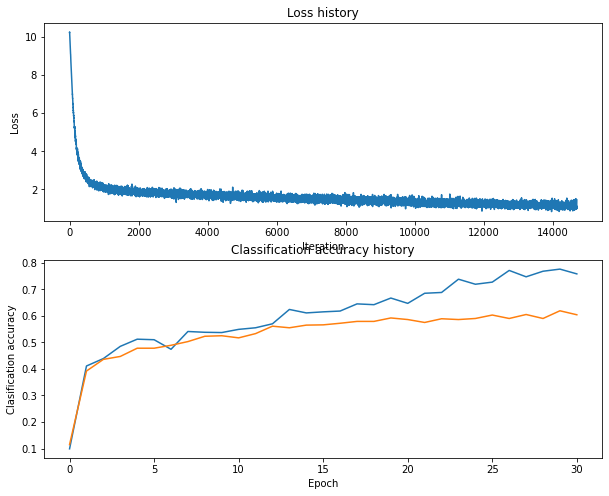

In [55]:
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

learning_rate = 3.14e-4
weight_scale = 2.5e-2
model = FullyConnectedNet([600, 500, 400, 300, 200, 100],
                          weight_scale = weight_scale, 
                          dtype = np.float64,
                          dropout = 0.25,
                          use_batchnorm = True,
                          reg = 1e-2)
solver = Solver(model, 
                data, 
                print_every = 500, 
                num_epochs = 30, 
                batch_size = 100,
                update_rule = 'adam', 
                optim_config = {'learning_rate': learning_rate,},
                lr_decay = 0.9)

solver.train()
scores = model.loss(data['X_test'])
y_pred = np.argmax(scores, axis = 1)
acc = np.mean(y_pred == data['y_test'])
print('test acc: %f' % acc)

plt.subplot(2, 1, 1)
plt.plot(solver.loss_history)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, label='train')
plt.plot(solver.val_acc_history, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

## Test your model

In [57]:
# 我们在验证集和测试集上验证我们最好的模型，在验证集上至少可以达到 50% 的准确率
best_model  = model
y_test_pred = np.argmax(best_model.loss(X_test), axis = 1)
y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
print('Validation set accuracy: ', (y_val_pred == y_val).mean())
print('Test set accuracy: ', (y_test_pred == y_test).mean())



Validation set accuracy:  0.604
Test set accuracy:  0.595
